## ECDC COVID-19 Data: First Exploration

J. Colliander  
2020-03-24

> The goal of this notebook is to implement the ideas in [this Medium post](https://medium.com/@vilhelmp/get-covid-19-dataset-into-a-pandas-dataframe-bb5eb23097550) by Magnus Vilhelm Persson. The target is to effectively download the COVID-19 cases data (from the European Centre for Disease Control (ECDC)) by region (mostly countries), make this data available in the form of a Pandas DataFrame, and generate a first few visualizations. 

In [3]:
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns 
DATE = datetime.today()
DATE_STR = DATE.strftime('%Y-%m-%d')
BASE_URL = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{DATE_STR}.xlsx'
print(f'Downloading for {DATE_STR}')
while True:
    try:
        BASE_URL = f'https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-{DATE_STR}.xlsx'
        data_world = pd.read_excel(BASE_URL)
        print('Success!')
        break
    except:
        print(f'Couldn\’t get data for {DATE_STR}, trying a day before…')
        # subtract a day
        DATE = DATE - timedelta(days=1)
        DATE_STR = DATE.strftime('%Y-%m-%d')

Success!


In [4]:
# some preprocessing
# change column names
data_world.rename(columns={'DateRep':'datestr','Countries and territories':'country', 'Cases':'cases', 'Deaths':'deaths', 'GeoId':'geoid'},
inplace=True)# convert dates
data_world['date'] = pd.to_datetime(data_world.datestr, format= "%Y-%m-%d")# remove unnecessary columns 
data_world.drop('Day', axis=1, inplace=True)
data_world.drop('Month', axis=1, inplace=True)
data_world.drop('Year', axis=1, inplace=True)
data_world.drop('datestr', axis=1, inplace=True)# set date as index
data_world = data_world.set_index('date').sort_index()# calculate cases for the whole world
total = data_world.groupby('date').sum()
# add columns and add to full dataframe
total['geoid'] = 'W'
total['country'] = 'World'
#total['datestr'] = total.index.astype('str')
total.reset_index()
data_world = data_world.append(total, sort=False)# calculate cases for world outside China
total_outcn = data_world.query("geoid not in ['W', 'CN']").groupby('date').sum()
# add columns and add to full dataframe
total_outcn['geoid'] = 'OUTC'
total_outcn['country'] = 'OutsideC'
#total['datestr'] = total.index.astype('str')
total_outcn.reset_index()
data_world = data_world.append(total_outcn, sort=False)# calculate cumulative sum for each country
data_world['cases_cum'] = data_world.groupby(['country'])['cases'].cumsum()
data_world['deaths_cum'] = data_world.groupby(['country'])['deaths'].cumsum()

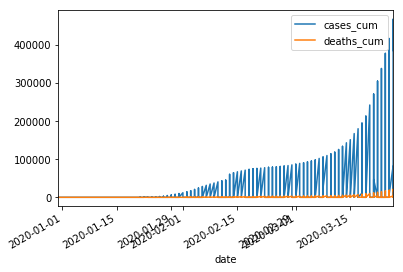

In [5]:
data_world[['cases_cum','deaths_cum']].plot()

Yay! I've implemented the Medium article. 2020-03-24, 9:26pm.

In [6]:
## Identify programs that have received the most funding
pd.pivot_table(data_world, index=['country'], aggfunc=max,
               values = ['cases_cum', 'deaths_cum']
              ).sort_values(by=['cases_cum'], ascending=False)

,cases_cum,deaths_cum
country,,
World,467710,20947
OutsideC,385742,17654
China,81968,3293
Italy,74386,7505
United_States_of_America,69194,1050
Spain,47610,3434
Germany,36508,198
Iran,27017,2077
France,25233,1331


## Focus on a single country

In [7]:
COUNTRY = 'Italy'

In [8]:
local = data_world.loc[(data_world['country'] == COUNTRY)]

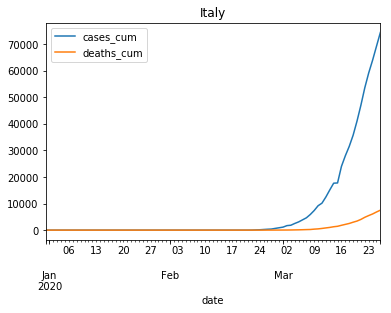

In [9]:
local[['cases_cum', 'deaths_cum']].plot(title = COUNTRY)

## Focus on a group of countries for comparison

In [13]:
Comparisons = ['Canada', 'United_States_of_America', 'France', 'Germany', 'South_Korea', 'China', 'Italy']

In [14]:
subset = data_world.loc[(data_world['country'].isin(Comparisons))]

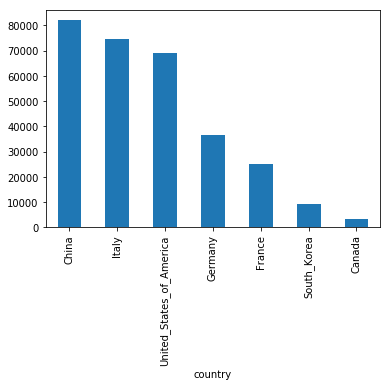

In [45]:
(subset.groupby(['country']).sum()['cases']).sort_values(ascending = False).plot(kind='bar')

In [31]:
data_world['country'].unique()

array(['New_Zealand', 'Philippines', 'Ireland', 'India', 'San_Marino',
       'South_Korea', 'Ecuador', 'Netherlands', 'Germany', 'Sweden',
       'Luxembourg', 'Pakistan', 'Spain', 'Malaysia', 'Egypt', 'Russia',
       'Switzerland', 'Czech_Republic', 'Estonia', 'Taiwan', 'Greece',
       'Japan', 'United_Kingdom', 'Romania', 'Bahrain',
       'United_Arab_Emirates',
       'Cases_on_an_international_conveyance_Japan', 'Australia',
       'Canada', 'Iceland', 'Nigeria', 'Italy', 'Mexico', 'Kuwait',
       'Iran', 'Azerbaijan', 'Oman', 'Qatar', 'Indonesia', 'Cambodia',
       'Georgia', 'Singapore', 'France', 'Thailand', 'Denmark', 'Israel',
       'Lebanon', 'Sri_Lanka', 'Vietnam', 'Monaco', 'Brazil', 'Belarus',
       'Norway', 'Dominican_Republic', 'Lithuania', 'Finland', 'Armenia',
       'United_States_of_America', 'North_Macedonia', 'Nepal', 'Algeria',
       'Iraq', 'Afghanistan', 'Belgium', 'China', 'Croatia', 'Austria',
       'Sint_Maarten', 'Latvia', 'Jordan', 'Andorra', 'Mo

The set of `country` variables includes `World` and `OutsideC`. I want to exclude these categories.

In [32]:
# df['country'].unique()
countries = ['New_Zealand', 'Philippines', 'Ireland', 'India', 'San_Marino',
       'South_Korea', 'Ecuador', 'Netherlands', 'Germany', 'Sweden',
       'Luxembourg', 'Pakistan', 'Spain', 'Malaysia', 'Egypt', 'Russia',
       'Switzerland', 'Czech_Republic', 'Estonia', 'Taiwan', 'Greece',
       'Japan', 'United_Kingdom', 'Romania', 'Bahrain',
       'United_Arab_Emirates',
       'Cases_on_an_international_conveyance_Japan', 'Australia',
       'Canada', 'Iceland', 'Nigeria', 'Italy', 'Mexico', 'Kuwait',
       'Iran', 'Azerbaijan', 'Oman', 'Qatar', 'Indonesia', 'Cambodia',
       'Georgia', 'Singapore', 'France', 'Thailand', 'Denmark', 'Israel',
       'Lebanon', 'Sri_Lanka', 'Vietnam', 'Monaco', 'Brazil', 'Belarus',
       'Norway', 'Dominican_Republic', 'Lithuania', 'Finland', 'Armenia',
       'United_States_of_America', 'North_Macedonia', 'Nepal', 'Algeria',
       'Iraq', 'Afghanistan', 'Belgium', 'China', 'Croatia', 'Austria',
       'Sint_Maarten', 'Latvia', 'Jordan', 'Andorra', 'Morocco',
       'Senegal', 'Portugal', 'Saudi_Arabia', 'Tunisia', 'Chile',
       'Poland', 'Argentina', 'Ukraine', 'Hungary', 'Liechtenstein',
       'Slovenia', 'Bosnia_and_Herzegovina', 'Bhutan', 'Palestine',
       'South_Africa', 'Serbia', 'Costa_Rica', 'Colombia', 'Slovakia',
       'Peru', 'Togo', 'Cameroon', 'Holy_See', 'Malta', 'Maldives',
       'Paraguay', 'Bulgaria', 'Moldova', 'Bangladesh', 'Albania',
       'Panama', 'Cyprus', 'Mongolia', 'Brunei_Darussalam',
       'Democratic_Republic_of_the_Congo', 'Burkina_Faso', 'Cuba',
       'Cote_dIvoire', 'Honduras', 'Jamaica', 'Turkey', 'Bolivia',
       'Ghana', 'Saint_Vincent_and_the_Grenadines', 'Aruba', 'Guyana',
       'Curaçao', 'Gabon', 'Trinidad_and_Tobago', 'Kenya', 'Ethiopia',
       'Sudan', 'Guinea', 'Namibia', 'Suriname', 'Kazakhstan', 'Rwanda',
       'Uruguay', 'Seychelles', 'Saint_Lucia', 'Venezuela', 'Guatemala',
       'Mauritania', 'Eswatini', 'Equatorial_Guinea',
       'Antigua_and_Barbuda', 'Bahamas', 'Kosovo', 'Congo',
       'Central_African_Republic', 'Uzbekistan', 'Benin', 'Somalia',
       'United_Republic_of_Tanzania', 'Liberia', 'Myanmar', 'Gambia',
       'Montenegro', 'Barbados', 'Zambia', 'Kyrgyzstan', 'Guam',
       'El_Salvador', 'Nicaragua', 'Djibouti', 'French_Polynesia',
       'Bermuda', 'Chad', 'Cayman_Islands', 'Jersey', 'Fiji',
       'Faroe_Islands', 'Gibraltar', 'Greenland', 'Mauritius', 'Guernsey',
       'Haiti', 'Zimbabwe', 'Papua_New_Guinea', 'Isle_of_Man',
       'Cape_Verde', 'Montserrat', 'New_Caledonia', 'Niger', 'Madagascar',
       'Timor_Leste', 'Eritrea', 'Uganda', 'Angola', 'Dominica', 'Syria',
       'Mozambique', 'Grenada', 'United_States_Virgin_Islands', 'Belize',
       'Turks_and_Caicos_islands', 'Libya', 'Laos',
       'Saint_Kitts_and_Nevis', 'Mali']

In [33]:
df = data_world.loc[(data_world['country'].isin(countries))]

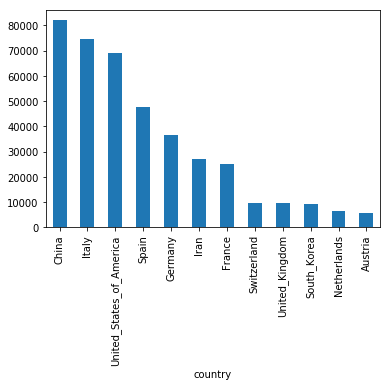

In [47]:
## Countries with most cases
(df.groupby(['country']).sum()['cases']).sort_values(ascending = False ).head(n=12).plot(kind='bar')

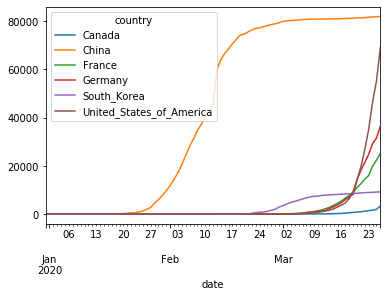

In [12]:
subset.pivot(columns="country", values="cases_cum").plot()